# Showcasing Pytesseract on one example

In [11]:
from typing import Dict, List, Union, Tuple, NamedTuple
from collections import namedtuple
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import pytesseract
import cv2
from PIL import Image, ImageDraw
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pathlib
from config import CONFIG

In [3]:
import sys
sys.path.insert(1, str(CONFIG.src))

In [4]:
%load_ext autoreload
%autoreload 2

In [13]:
from alignment_test import alignImages
from pyimagesearch.ocr import ocr

In [6]:
columns = ["box_name", "x", "y", "w", "h", "image_name", "image_width", "image_height"]
df = pd.read_csv(CONFIG.data / "annotations" / "labels_ocr_2021-04-11-06-27-41.csv", header=None)
df.columns = columns
df.head()

,box_name,x,y,w,h,image_name,image_width,image_height
0,Name,250,118,981,66,f1040--1988-1.png,1553,2042
1,Address,316,181,910,74,f1040--1988-1.png,1553,2042
2,Address,316,249,913,71,f1040--1988-1.png,1553,2042
3,SSN,1221,121,321,66,f1040--1988-1.png,1553,2042
4,Total Income,1275,1609,278,38,f1040--1988-1.png,1553,2042


In [ ]:
# df_ref = pd.read_csv(CONFIG.data / "annotations" / "final_project.csv", header=None)
# columns = ["box_name", "x", "y", "w", "h", "image_name", "image_width", "image_height", "stop_words"]
# df_ref.columns = columns
# df_ref.head()

In [7]:
im_path = str(CONFIG.data / "imgs" / "test_img.png") # image to extract texts
ref_path = str(CONFIG.data / "imgs" / "f1040--1988-1.png") # image for reference

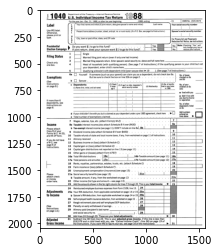

In [8]:
# reference image
template = cv2.imread(ref_path)
plt.imshow(template)

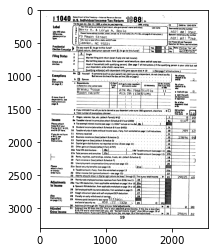

In [9]:
# image to extract text
im = cv2.imread(im_path)
plt.imshow(im)

Load images...
Perform alignment...
Get annotation information...
Performing OCR on input image...


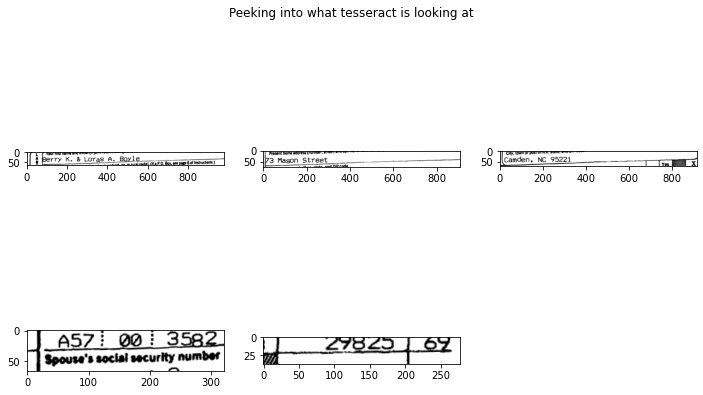

In [16]:
parsingResults = ocr(im_path, ref_path, 0, df, debug=True)

In [17]:
parsingResults

[(OCRLocation(id='Name', bbox=(250, 118, 981, 66), filter_keywords=None),
  'erry K. & Loras A. Bo'),
 (OCRLocation(id='Name', bbox=(250, 118, 981, 66), filter_keywords=None),
  'ome mia eeuite)'),
 (OCRLocation(id='Address', bbox=(316, 181, 910, 74), filter_keywords=None),
  'iy. eee'),
 (OCRLocation(id='Address', bbox=(316, 181, 910, 74), filter_keywords=None),
  '3 Mason Street'),
 (OCRLocation(id='Address', bbox=(316, 249, 913, 71), filter_keywords=None),
  'Camden, NC_95221 __'),
 (OCRLocation(id='SSN', bbox=(1221, 121, 321, 66), filter_keywords=None),
  'AS7 i 3')]

The results are pretty close. However, there are some fixes need to be done:

- There are some words that do not have any meanings. e.g: "ome mia eeuite", "iy. eee". These happen because when I align images, they are not perfectly lined up so parts of the words are included. Tesseract recognize these words and output them. 
- The social security number is not correct. The output is "AS7 i 3" while the correct answer is "A57 00 3582". It appears that tesseract mistook 5 for S and it was not able to distinguish 0s. It also was not able to recognize letters or numbers that stick together.
- The last result tesseract was not able to capture at all because the coordinates did not line up correctly.